# ****Customer Churn Prediction Using Naural Networks****

## ****Importing Libraries****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## ****Import Dataframe****

In [2]:
df = pd.read_csv(r'/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns = df.columns.astype(str).str.strip().str.lower()
df.columns
df.head(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## ****Exploratory Data Analysis****

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [6]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include = ['object', 'category'])

,geography,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


## ****Divide Data In training and Testing Data****

In [8]:
input_df = df.iloc[:, : -1]
output_df = df['exited']

## ****OneHotEncoding Using ColumnTransformer****

In [9]:
trf = ColumnTransformer([
    ('OneHotEncode_geography', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), [1]),
    ('OneHotEncode_gender', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, drop = 'first'), [2])
], remainder = 'passthrough')


input_df = pd.DataFrame(trf.fit_transform(input_df))


In [10]:
input_df.columns = trf.get_feature_names_out().tolist()
input_df.rename(columns = {'OneHotEncode_geography__geography_France' : 'from_france', 'OneHotEncode_geography__geography_Germany' : 'from_germany',
                 'OneHotEncode_geography__geography_Spain' : 'from_spain', 'OneHotEncode_gender__gender_Male' : 'male',
                 'remainder__creditscore' : 'creditscore', 'remainder__age' : 'age', 'remainder__tenure' : 'tenure', 'remainder__balance' : 'balance',
                 'remainder__numofproducts' : 'numofproducts', 'remainder__hascrcard' : 'hascrcard', 'remainder__isactivemember' : 'isactivemember', 
                 'remainder__estimatedsalary' : 'estimatedsalary'}, inplace = True)
input_df.head()

,from_france,from_germany,from_spain,male,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,1.0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


## ****Differentiating into numerical and categorical columns****

In [11]:
num_col = input_df[['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']]
display(num_col.head(2))

cat_col = input_df[['from_france', 'from_germany', 'from_spain', 'male', 'hascrcard', 'isactivemember']]
display(cat_col.head(2))

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
0,619.0,42.0,2.0,0.00,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,112542.58


,from_france,from_germany,from_spain,male,hascrcard,isactivemember
0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0


## ****Apply Standard Scalar Using Columntransformer****

In [12]:
trf1 = ColumnTransformer([
    ('StandardScalar', StandardScaler(), num_col.columns)
], remainder = 'passthrough')


num_col = pd.DataFrame(trf1.fit_transform(num_col), columns = num_col.columns)
num_col

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276
...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231


In [13]:
input_df = pd.concat([cat_col, num_col], axis = 1)

display(input_df.head())

display(input_df.shape)


,from_france,from_germany,from_spain,male,hascrcard,isactivemember,creditscore,age,tenure,balance,numofproducts,estimatedsalary
0,1.0,0.0,0.0,0.0,1.0,1.0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,0.0,0.0,1.0,0.0,0.0,1.0,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,1.0,0.0,0.0,0.0,1.0,0.0,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,1.0,0.0,0.0,0.0,0.0,0.0,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,0.0,0.0,1.0,0.0,1.0,1.0,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


(10000, 12)

## ****Train Test Split****

In [14]:
X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [15]:
X_train.shape

(8000, 12)

## ****Importing Tensorflow Libraries****

In [90]:
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

## ****Applying Neural Network****

In [91]:
ann = Sequential()

In [92]:
ann.add(Dense(10, input_dim = 12, activation = 'relu', kernel_regularizer = L2(l2 = 0.01)))
ann.add(Dense(7, activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dense(6, activation = 'relu'))
ann.add(Dense(3, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [93]:
ann.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [94]:
ann.fit(X_train, y_train, batch_size = 100, epochs = 50, validation_data = [X_test, y_test], callbacks = EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3610 - loss: 0.8583 - val_accuracy: 0.8035 - val_loss: 0.6921
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7631 - loss: 0.6919 - val_accuracy: 0.8035 - val_loss: 0.5930
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8057 - loss: 0.5761 - val_accuracy: 0.8105 - val_loss: 0.5124
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8170 - loss: 0.5000 - val_accuracy: 0.8215 - val_loss: 0.4595
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8251 - loss: 0.4399 - val_accuracy: 0.8250 - val_loss: 0.4257
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8237 - loss: 0.4254 - val_accuracy: 0.8310 - val_loss: 0.4038
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8395 - loss: 0.3997 - val_accuracy: 0.8440 - val_loss: 0.3919
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8444 - loss: 0.3971 - val_accuracy: 0.8515 - val_loss:

In [95]:
y_pred_train = ann.predict(X_train)
pred_train = []
for i in y_pred_train:
    if i[0] > 0.5:
        pred_train.append(1)
    else:
        pred_train.append(0)

y_pred_train = pd.Series(pred_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
y_pred = ann.predict(X_test)
pred = []
for i in y_pred:
    if i[0] > 0.5:
        pred.append(1)
    else:
        pred.append(0)

y_pred = pd.Series(pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [97]:
train_acc = ann.history.history['accuracy']
test_acc = ann.history.history['val_accuracy']
display(len(train_acc))

11

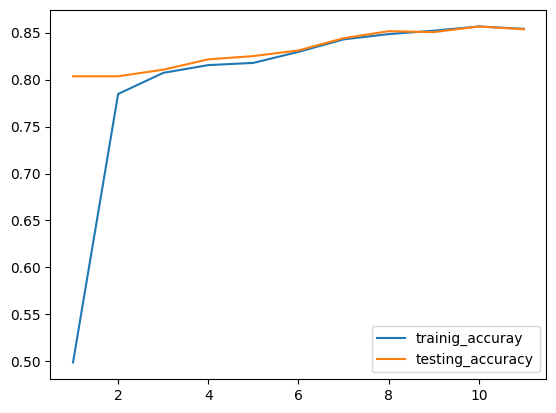

In [98]:
plt.plot([i for i in range(1, len(train_acc) + 1)], train_acc, label = 'trainig_accuray')
sns.lineplot(x = [i for i in range(1, len(test_acc) + 1)], y = test_acc, label = 'testing_accuracy')
plt.legend()
plt.show()

## ****Accuracy Score****

In [102]:
# Accuracy Of train Data
train_accuracy = np.round(accuracy_score(y_train, y_pred_train) * 100, 2)
print(train_accuracy)

85.59


In [103]:
# Accuracy Score of Test Data

test_accuracy = np.round(accuracy_score(y_test, y_pred) * 100, 2)
print(test_accuracy)

85.35


## ****Loss****

- In any model our ultimate goal is to minimize the loss & not just increasing training or testing accuracy.
- So we have achieved 

In [114]:
loss = train_accuracy - test_accuracy
print(loss)

0.2400000000000091
